<table>
<tr><td>&nbsp;</td></tr>
</table>
<table>
<tr><td>&nbsp;</td></tr>
</table>
<center><h1><u>D206 - Data Cleaning</u></h1></center>
<br>
    <center><h4>April 24, 2022</h4></center>
    <center><h3>Jessa Green</h3></center>
    <center><h4>SID# 71314</h4></center>
    <center><h4>Western Governors University</h4></center>


<table>
<tr><td>&nbsp;</td></tr>
</table>
<table>
<tr><td>&nbsp;</td></tr>
</table>
<table>
<tr><td>&nbsp;</td></tr>
</table>

# Table of Contents <a name="toc"></a>

### Part I: [Research Question and Variables](#pt1)

   - A. [Description of Research Question](#a)
    
   - B. [Description of Data Set Variables](#b)
 
### Part II: [Data-Cleaning Plan](#pt2)

   - C1. [Detection Methods](#c1)
     
   - C2. [Justification for Detection Methods](#c2)
     
   - C3. [Justification for Program Language](#c4)
     
   - C4. [Detection Code](#c4)
     
### Part III: [Data Cleaning Treatment](#pt3)

   - D1. [Discussion of Findings](#d1)
   
   - D2. [Treatment Methods and Justification](#d2)
   
   - D3. [Summary of Treatment](#d3)
   
   - D4. [Treatment Code](#d4)
   
   - D5. [Clean Dataset](#d5)
   
   - D6. [Limitations](#d6)
   
   - D7. [Implications](#d7)
   
   - E1. [Variables and PCA Loadings](#e1)
   
   - E2. [PCs Selection](#e2)
   
   - E3. [Benefits](#e3)

### Part IV: [Supporting Documents](#pt4)

   - F. [Video Demonstration of Code Functionality](#f)
   
   - G. [Acknowledge Sources](#g)   

# Part I: Research Question And Variables  <a name="pt1"></a> 

## A. Description of Research Question <a name="a"></a> 
Our telecommunications company wants to reduce churn in order to increase profits and reduce marketing costs by maintaining our current clients. In order to acheive these goals, the research question we want to address, based on our current data set, is:

**Which current/active customers in our data set are most likely to discontinue services with us in the near future?**

## B. Description of Data Set Variables <a name="b"></a> 
I performed an initial visual inspection of the entire dataset using the provided Churn Data Set Data Dictionary as well as by opening the dataset csv file in Microsoft Excel and by using Python code (see the proceeding cell blocks beneath my provided overview table). 

#### Overview of all Variables in Raw Data Set 
|  Original Name |  New Name |  Data Type |  Variable Type|Description | #Missing | #Unique  | Example or Range  |
|:--------------:|:---------:|:----------:|:-------------:|:-----------|---------:|---------:|------------------:|
|Unnamed|n/a|int64|UID - not for analysis|DELETED COL - Duplication of CaseOrder column|0|10000|1 - 10000|
|CaseOrder|case_order|int64|UID - not for analysis|Index to preserve original order of raw data|0|10000|1 - 10000|
|Customer_id|cust_id|object|UID - not for analysis|Unique ID per customer|0|10000|"K409198, S120509, D90850"|
|Interaction|interaction_id|object|UID - not for analysis|Unique ID per customer transaction|0|10000|aa90260b-4141-4a24-8e36-b04ce1f4f77b|
|City|city|object|categorical - nominal|City of customer residence|0|6058|"Point Baker, West Branch..."|
|State|state|object|categorical - nominal|State of customer residence|0|52|"AK, MI, OR, CA..."|
|County|county|object|categorical - nominal|County of customer residence|0|1620|"Ogemaw, Yamhill, San Diego..."|
|Zip|zip|int64|categorical - ordinal|Zip code of customer residence|0|8583|601 - 99929|
|Lat|latitude|float64|numeric - continuous|GPS Latitude of customer residence|0|8563|17.96612 - 70.64066|
|Lng|longitude|float64|numeric - continuous|GPS Longitude of customer residence|0|8655|-171.68815 - -65.66785|
|Population|population|int64|numeric - discrete|Population within one mile radius of customer|0|5933|0 - 111850|
|Area|area|object|categorical - nominal|Area type around customer residence|0|3|"rural, urban, suburban"|
|Timezone|timezone|object|categorical - ordinal|Time Zone of customer residence|0|25|"Pacific/Honolulu, America/New_York"|
|Job|job|object|categorical - nominal|Job of customer|0|639|"Comptroller, Paramedic"|
|Children|children|float64|numeric - discrete|Number of children in customer household|2495|12|0 - 10|
|Age|age|float64|numeric - discrete|Age of customer when they signed up|2475|73|18 - 89|
|Education|education|object|categorical - ordinal|Highest degree earned as reported by customer|0|12|"Bachelor's Degree, 9th Grade to 12th Grade"|
|Employment|employment|object|categorical - nominal|Employment status as reported by customer|0|5|"Student, Part Time, Full Time, Retired, Unemployed"|
|Income|income|float64|numeric - continuous|Annual income as reported by customer|2490|7507|740.66 - 258900.7|
|Marital|marital|object|categorical - nominal|Marital status as reported by customer|0|5|"Never Married, Married, Separated, Divorced, Widowed"|
|Gender|gender|object|categorical - nominal|Gender as reported by customer|0|3|"Male, Female, Prefer not to answer"|
|Churn|churn|object|categorical - nominal|Whether customer discontinued service within last month|0|2|"Yes, No"|
|Outage_sec_perweek|outage_sec_wk|float64|numeric - continuous|Average # of seconds/week of system outages in customer's area|0|9993|-1.348571 - 47.04928|
|Email|email_contact_yr|int64|numeric - discrete|Number of emails sent to customer |0|23|1 - 23|
|Contacts|support_reqs_total|int64|numeric - discrete|Number of times customer contacted tech support|0|8|0 - 7|
|Yearly_equip_failure|equip_failure_yr|int64|numeric - discrete|Numer of times annually customer's equipment failed|0|6|0 - 6|
|Techie|cust_is_techie|object|categorical - nominal|Whether customer considers themselves technically inclined|2477|3|"Yes, No, NA"|
|Contract|contract_term|object|categorical - nominal|Contract term of the customer|0|3|"Month-to-month, One year, Two year"|
|Port_modem|portable_modem|object|categorical - nominal|Whether customer has a portable modem|0|2|"Yes, No"|
|Tablet|tablet|object|categorical - nominal|Whether customer owns a tablet device|0|2|"Yes, No"|
|InternetService|internet_service|object|categorical - nominal|Customer's internet service provider|0|3|"DSL, Fiber Optic, None"|
|Phone|phone_service|object|categorical - nominal|Whether the customer has a phone service|1026|3|"Yes, No, NA"|
|Multiple|multi_ph_lines|object|categorical - nominal|Whether the customer has multiple phone lines|0|2|"Yes, No"|
|OnlineSecurity|online_security|object|categorical - nominal|Whether the customer has an online security add-on|0|2|"Yes, No"|
|OnlineBackup|online_backup|object|categorical - nominal|Whether the customer has an online backup add-on|0|2|"Yes, No"|
|DeviceProtection|device_protection|object|categorical - nominal|Whether the customer has device protection add-on|0|2|"Yes, No"|
|TechSupport|tech_support|object|categorical - nominal|Whether the customer has a technical support add-on|991|3|"Yes, No"|
|StreamingTV|streaming_tv|object|categorical - nominal|Whether the customer has streaming TV|0|2|"Yes, No"|
|StreamingMovies|streaming_movies|object|categorical - nominal|Whether the customer has streaming movies|0|2|"Yes, No"|
|PaperlessBilling|paperless_bill|object|categorical - nominal|Whether the customer has paperless billing|0|2|"Yes, No"|
|PaymentMethod|pay_method|object|categorical - nominal|Customer's payment method|0|4|"Electronic Check, Mailed Check, Bank Transfer(automatic), Credit Card (automatic)"|
|Tenure|tenure|float64|numeric - continuous|Number of months customer has stayed with the provider|931|9066|1.00025934 - 71.99928|
|MonthlyCharge|monthly_charge|float64|numeric - continuous|Monthly amount charged to the customer |0|9984|77.50523 - 315.8786|
|Bandwidth_GB_Year|bandwidth_gb_yr|float64|numeric - continuous|Average amount of data used annually by customer (in GB)|1021|8973|155.5067148 - 7158.982|
|item1|timely_resp|int64|categorical - ordinal|"Timely response on cust survey (1=most important/8=least important)"|0|7|1 - 7|
|item2|timely_fix|int64|categorical - ordinal|"Timely fixes on cust survey (1=most important/8=least important)"|0|7|1 - 7|
|item3|timely_replace|int64|categorical - ordinal|"Timely replacements on cust survey (1=most important/8=least important)"|0|8|1 - 8|
|item4|reliability|int64|categorical - ordinal|"Reliability on cust survey (1=most important/8=least important)"|0|7|1 - 7|
|item5|options|int64|categorical - ordinal|"Options on cust survey (1=most important/8=least important)"|0|7|1 - 7|
|item6|respectful|int64|categorical - ordinal|"Respectful response on cust survey (1=most important/8=least important)"|0|8|1 - 8|
|item7|courteous|int64|categorical - ordinal|"Courteous exchange on cust survey (1=most important/8=least important)"|0|7|1 - 7|
|item8|active_listening|int64|categorical - ordinal|"Evidence of active listening on cust survey (1=most important/8=least important)"|0|8|1 - 8|

In [2]:
# Import python libraries / packages for use throughout this notebook
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sb

In [3]:
# Read in the Churn Data Set
raw_df = pd.read_csv('churn_raw_data.csv')
raw_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
raw_df.tail()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.8288,6511.253,3,2,3,3,4,3,2,3
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,208.8564,5695.952,4,5,5,4,4,5,2,5
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,168.2209,4159.306,4,4,4,4,4,4,4,5
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.6286,6468.457,4,4,6,4,3,3,5,4
9999,10000,10000,T38070,9de5fb6e-bd33-4995-aec8-f01d0172a499,Clarkesville,GA,Habersham,30523,34.70783,-83.53648,...,218.3710,5857.586,2,2,3,3,3,3,4,1


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

[(return to TOC)](#toc)
# Part II: Data-Cleaning Plan  <a name="pt2"></a> 
## C. Explain the plan for cleaning the data by doing the following:

### C1. Detection Methods <a name="c1"></a> 
Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set. *The proposal includes a detailed description of the techniques and steps needed for identifying anomalies in the selected data set.*

**Discuss what methods you used to detect duplicates, missing values, outliers, and any other data quality issues.  In this section discuss re-expressed variables (if used).  Remember, you need to detect outliers for all quantitative variables.**

According to research by Larose and Larose (2019), some of the key steps in data preparation before exploration and use with modeling and algorithms include adding an index field, identifying and handling duplicates, outliers, and missing data, transforming and standardizing the data, binning numerical variables, and reclassifying categorical variables. I'll reserve the latter three items for Part III of this process, since those come after the detected issues (duplicates, outliers, and missing data) are treated.

**Initial Cleaning Steps**

To start, while not listed in the above 'data prep' list, I chose to rename the dataset columns in order to standardize naming and improve comprehension (see code C4a). All other treatments will be handled in Part III under Treatments, but for ease of communication and to reduce confusion, I performed this at the start of this project. Going forward, I will refer to all columns by their "New Name" from the overview table provided in Section B. Also, our data set already has the index `case_order` provided, which was specified in the Data Dictionary provided with the data set. We also had several data types that are inappropriate for the type of information stored in those columns, which seem clear when reviewing standard practice for data cleaning.

- Findings:
    - `zip` datatype is int64, should be string
    - `children` is float, should be int64
    - `age` is float, should be int64
    - `age` also is a relatively invalid attribute, since that number becomes outdated within one year and is no longer really usable. Should have gathered DOB, not age
    - `monthly_charge` should have a decimal restriction of 2, since this is a money field
    - `state` has 52 unique values, should only be 50

**Duplicates**

From my visual inspection in Section B, it appeared that `case_order` had a duplicate column, `Unnamed: 0`. This was confirmed utilizing a python function (see code section C4b). Following that, additional code was run to check for duplicate rows across the entire data set, as well as checking specifically for duplicate customer IDs and checking for records that might imply duplicated customer records with differing ID numbers by utilizing the `subset` keyword in the `duplicated()` method.

- Findings:
    - It appears there are no duplicated records in our data set

**Missing Data**
- Review each attribute with missing values to identify what/why
- Check invalid category values in categorical attributes
    - `state` has 52 category values because they included "DC" and "PR" along with the 50 states, so no change required
    - 

**Outliers**

Outliers were next on my list to address (section C4c below). I chose to address outliers before missing data so that any form of imputation on the missing data wouldn't be inappropriately impacted by outliers. According to Pandas documentation (How Do I Select a Subset of a DataFrame?, n.d.), I created a subset `numeric_subset_df` of the numeric attributes in the data set. From that subset, I used the `.describe()` method, followed by a histogram plot of each numeric attribute. I noticed in the stats descriptions that the `outage_sec_wk` attribute had a min value of a negative amount, which is impossible, since there cannot be a negative amount of outage time.

- Findings:
    - Negative value(s) in the `outage_sec_wk` column
    - `zip` as int64 has values with less than the minimum 5 characters required of all US zip codes
    - No other outliers seem to be errors nor unnatural, and not so far out as to inflict large shifts to the dataset overall



This is in Part III (after detection of dirty/messy data)
- transforming and standardizing the data:
- binning numerical variables
- reclassifying categorical variables

### C2. Justification for Detection Methods <a name="c2"></a> 
Justify your approach for assessing the quality of the data, include:
- characteristics of the data being assessed
- the approach used to assess the quality of the data
- ensure approach aligns with this data set

**Discuss why you selected the methods discussed in C1. Use credible sources (i.e. course textbook) to support your why!**

Outliers:  
- Z-Scores - generally only safe with normal distributions, so avoided this method as most are not normally 

|  Anomaly    | Strategy    | Objective     | Technique     |
|------------|-----------|-----------|------------------|


### C3. Justification for Program Language <a name="c3"></a> 
Justify your selected programming language and any libraries and packages that will support the data-cleaning process. *The justification describes the benefits of using the programming language, including any libraries and packages used to clean the data, and includes specific examples of how these tools are ideal in this scenario as opposed to other available tools.*

**Discuss what programming language you used to clean your data (including libraries and packages) and why.**

| Library                      | Application                                                             |
|------------------------------|-------------------------------------------------------------------------|
| Pandas | DataFrames |
| NumPy |  

### C4. Detection Code <a name="c4"></a> 
Provide the complete and executable code you will use to identify the anomalies in the data.

**Provide the code (no screenshots) used to detect duplicates, missing values, outliers (all numeric values that are related to customer/patient), and any other data cleaning matters. Remember, you need to detect outliers for all quantitative variables.**

#### C4a - Initial Cleaning Needs

In [6]:
# Rename columns based on Overview Table "New Names" listed above
col_renaming = {'CaseOrder': 'case_order',
                'Customer_id': 'cust_id',
                'Interaction': 'interaction_id',
                'City': 'city',
                'State': 'state',
                'County': 'county',
                'Zip': 'zip',
                'Lat': 'latitude',
                'Lng': 'longitude',
                'Population': 'population',
                'Area': 'area',
                'Timezone': 'timezone',
                'Job': 'job',
                'Children': 'children',
                'Age': 'age',
                'Education': 'education',
                'Employment': 'employment',
                'Income': 'income',
                'Marital': 'marital',
                'Gender': 'gender',
                'Churn': 'churn',
                'Outage_sec_perweek': 'outage_sec_wk',
                'Email': 'email_contact_yr',
                'Contacts': 'support_reqs_total',
                'Yearly_equip_failure': 'equip_failure_yr',
                'Techie': 'cust_is_techie',
                'Contract': 'contract_term',
                'Port_modem': 'portable_modem',
                'Tablet': 'tablet',
                'InternetService': 'internet_service',
                'Phone': 'phone_service',
                'Multiple': 'multi_ph_lines',
                'OnlineSecurity': 'online_security',
                'OnlineBackup': 'online_backup',
                'DeviceProtection': 'device_protection',
                'TechSupport': 'tech_support',
                'StreamingTV': 'streaming_tv',
                'StreamingMovies': 'streaming_movies',
                'PaperlessBilling': 'paperless_bill',
                'PaymentMethod': 'pay_method',
                'Tenure': 'tenure',
                'MonthlyCharge': 'monthly_charge',
                'Bandwidth_GB_Year': 'bandwidth_gb_yr',
                'item1': 'timely_resp',
                'item2': 'timely_fix',
                'item3': 'timely_replace',
                'item4': 'reliability',
                'item5': 'options',
                'item6': 'respectful',
                'item7': 'courteous',
                'item8': 'active_listening'}

raw_df.rename(columns=col_renaming, inplace=True)

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   case_order          10000 non-null  int64  
 2   cust_id             10000 non-null  object 
 3   interaction_id      10000 non-null  object 
 4   city                10000 non-null  object 
 5   state               10000 non-null  object 
 6   county              10000 non-null  object 
 7   zip                 10000 non-null  int64  
 8   latitude            10000 non-null  float64
 9   longitude           10000 non-null  float64
 10  population          10000 non-null  int64  
 11  area                10000 non-null  object 
 12  timezone            10000 non-null  object 
 13  job                 10000 non-null  object 
 14  children            7505 non-null   float64
 15  age                 7525 non-null   float64
 16  educa

In [38]:
# Find all unique state names listed to identify the "extra 2"
sorted(raw_df.state.unique())


['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

**The two "extra" states include 'DC' and 'PR' which are legally part of the US, just not typically listed as "states".**

#### C4b - Detect Duplicates (columns and rows)

Using visual comparisons, the first column (Unnamed: 0) seemed out of place and visually it appeared that the column's contents were identical (duplicate) to the CaseOrder column. I then built a function to do a full check to compare the columns and identify exact duplication.

In [7]:
# Define a function to compare all columns and identify full-column duplication
# Code concept from Geeks4Geeks website. See source in Section G

def FindDupCols(df):
    dup_cols = {}
    for columns in range(df.shape[1]):
        col1 = df.iloc[:, columns]
        for other_cols in range(columns + 1, df.shape[1]):
            col2 = df.iloc[:, other_cols]
            if col1.equals(col2):
                col1_name = df.columns.values[columns]
                col2_key = df.columns.values[other_cols]
                dup_cols[col1_name]=(col2_key)
    return dup_cols


# Run the function against our raw dataframe to identify any duplicate columns

dup_cols = FindDupCols(raw_df)
print("Duplicated Columns in Data Set:")
print(dup_cols)

Duplicated Columns in Data Set:
{'Unnamed: 0': 'case_order'}


**The above column `Unnamed: 0` will be removed during the Section III: Treatment stage.**

In [8]:
# Check for identical rows across the dataset
duplicate_rows = raw_df.duplicated(keep=False)
raw_df[duplicate_rows]

,Unnamed: 0,case_order,cust_id,interaction_id,city,state,county,zip,latitude,longitude,...,monthly_charge,bandwidth_gb_yr,timely_resp,timely_fix,timely_replace,reliability,options,respectful,courteous,active_listening


**We found no identical rows, so let's check for duplicate customer_id values**

In [9]:
# Check for duplicate customer IDs
duplicate_rows = raw_df.duplicated(subset='cust_id', keep=False)
raw_df[duplicate_rows]

,Unnamed: 0,case_order,cust_id,interaction_id,city,state,county,zip,latitude,longitude,...,monthly_charge,bandwidth_gb_yr,timely_resp,timely_fix,timely_replace,reliability,options,respectful,courteous,active_listening


**We can see there aren't any duplicated customer ID's in our dataset either**

In [10]:
# Check for rows that are identical EXCEPT for customer ID, which could mean one customer was assigned multiple IDs
column_names = ['city', 'state', 'zip', 'job', 'children', 'gender', 'employment', 'income', 'cust_is_techie', 'contract_term', 'monthly_charge']
duplicate_rows = raw_df.duplicated(subset=column_names, keep=False)
raw_df[duplicate_rows]

,Unnamed: 0,case_order,cust_id,interaction_id,city,state,county,zip,latitude,longitude,...,monthly_charge,bandwidth_gb_yr,timely_resp,timely_fix,timely_replace,reliability,options,respectful,courteous,active_listening


**Based on the above duplicate checks, I have strong confidence customer record duplication does not exist within the dataset.**

#### C4c - Detect Outliers

In [20]:
# Create a subset of the data set with only the numeric columns for further numeric analysis (outliers and missing data)
numeric_subset_df = raw_df[['zip','latitude', 'longitude', 'population', 'children', 'age', 'income', 'outage_sec_wk', 
                            'email_contact_yr', 'support_reqs_total', 'equip_failure_yr', 'tenure', 'monthly_charge', 
                            'bandwidth_gb_yr']]
numeric_subset_df.head()

,zip,latitude,longitude,population,children,age,income,outage_sec_wk,email_contact_yr,support_reqs_total,equip_failure_yr,tenure,monthly_charge,bandwidth_gb_yr
0,99927,56.25100,-133.37571,38,NaN,68.0,28561.99,6.972566,10,0,1,6.795513,171.449762,904.536110
1,48661,44.32893,-84.24080,10446,1.0,27.0,21704.77,12.014541,12,0,1,1.156681,242.948015,800.982766
2,97148,45.35589,-123.24657,3735,4.0,50.0,NaN,10.245616,9,0,1,15.754144,159.440398,2054.706961
3,92014,32.96687,-117.24798,13863,1.0,48.0,18925.23,15.206193,15,2,0,17.087227,120.249493,2164.579412
4,77461,29.38012,-95.80673,11352,0.0,83.0,40074.19,8.960316,16,2,1,1.670972,150.761216,271.493436


In [21]:
# Use the .describe method to visualize the core statistics for each numeric attribute in the data set
numeric_subset_df.describe()

,zip,latitude,longitude,population,children,age,income,outage_sec_wk,email_contact_yr,support_reqs_total,equip_failure_yr,tenure,monthly_charge,bandwidth_gb_yr
count,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752
std,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807
min,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715
25%,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529
50%,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500
max,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000


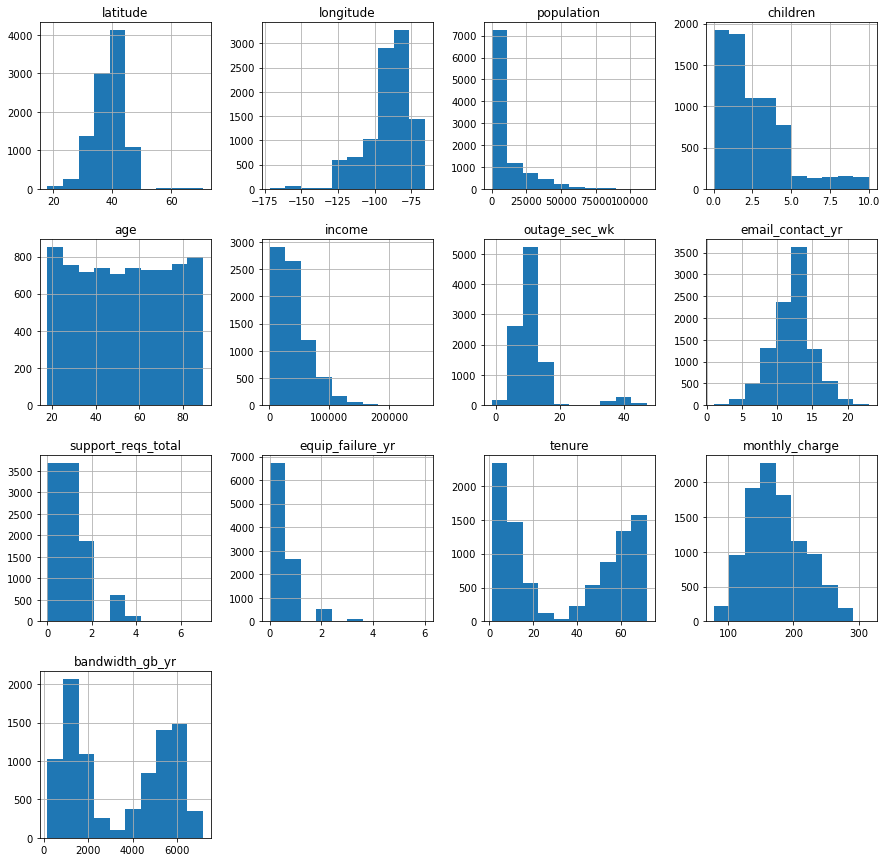

In [13]:
# View histograms of numeric attribures to visually identify potential outliers - check for extreme values beyond skew
import matplotlib.pyplot as plt

numeric_subset_df.hist(figsize=(15,15));

> **Boxplots great for finding ranges and outliers**

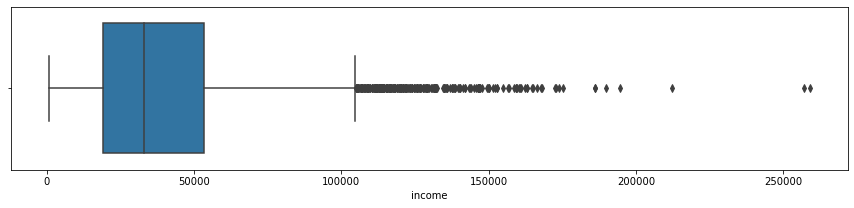

In [14]:
# Boxplot for income
plt.figure(figsize = (15,3))
boxplot = sb.boxplot(x='income', data=raw_df)

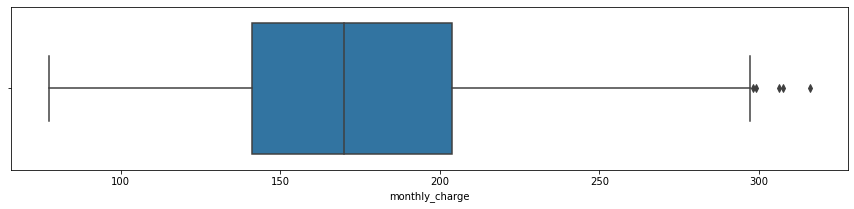

In [15]:
# Boxplot for monthly_charge
plt.figure(figsize = (15,3))
boxplot = sb.boxplot(x='monthly_charge', data=raw_df)

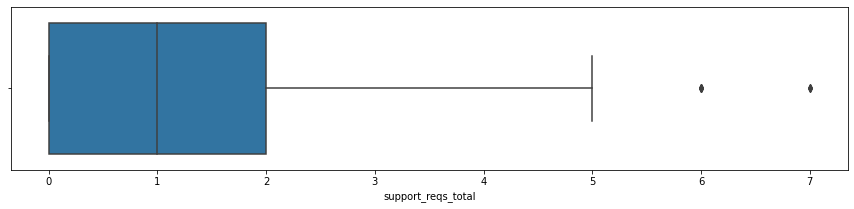

In [16]:
# Boxplot for support_reqs_total
plt.figure(figsize = (15,3))
boxplot = sb.boxplot(x='support_reqs_total', data=raw_df)

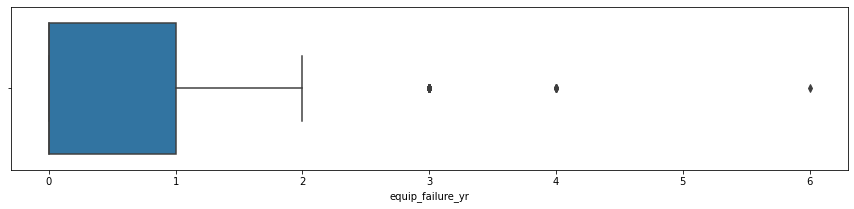

In [17]:
# Boxplot for equip_failure_yr
plt.figure(figsize = (15,3))
boxplot = sb.boxplot(x='equip_failure_yr', data=raw_df)

> You need to know volume (HOW MANY?) and value of them. From there you can specify what actions to take on them:
> Remove/Retain/Exclude/Replace


#### Detect Missing Data

In [17]:
numeric_subset_df.isnull().sum()

latitude                 0
longitude                0
population               0
children              2495
age                   2475
income                2490
outage_sec_wk            0
email_contact_yr         0
support_reqs_total       0
equip_failure_yr         0
tenure                 931
monthly_charge           0
bandwidth_gb_yr       1021
dtype: int64

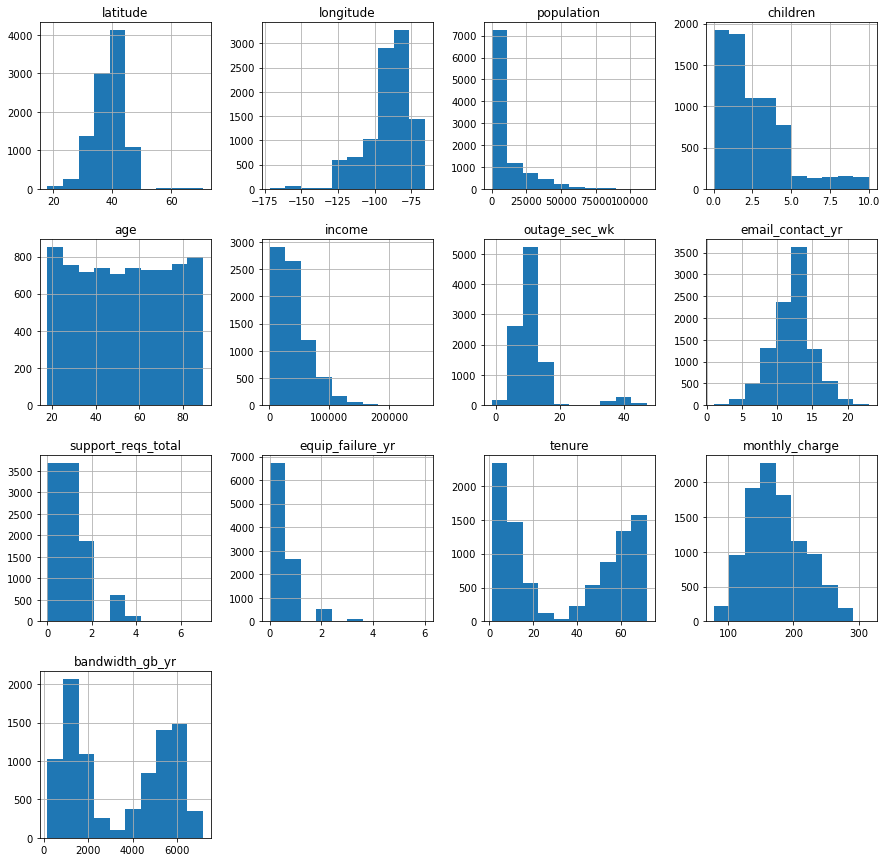

In [18]:
# C4c
# View histograms of numeric attribures to visually identify potentially misleading values (odd values for missing data)
import matplotlib.pyplot as plt

numeric_subset_df.hist(figsize=(15,15));

In [20]:
# Check outage_sec_wk to see if the bi-nomial distribution is due to a misleading value
print(numeric_subset_df['outage_sec_wk'].value_counts().head(10))

6.242131     2
15.015440    2
12.130800    2
12.107050    2
10.344120    2
10.768330    2
11.791120    2
40.314560    1
47.027660    1
10.859420    1
Name: outage_sec_wk, dtype: int64


#### Examine the Distribution

> **if skewed, use median for impute**

> **if normal dist, use mean**

#### Part II:
1) Examine ENTIRE dataset (every column, all values)
2) Detection of:
   - a) Duplicates
   - b) Missing Values
   - c) Outliers (check for outliers in ALL numeric variables)

#### Part III:
3) Treatment of:
   - a) Duplicates
   - b) Missing Values
   - c) Outliers (check for outliers in ALL numeric variables)
4) Re-express Categorical variables
5) Perform PCA (numeric only)
6) Extract clean dataset once cleaning is complete

[(return to TOC)](#toc)
# Part III: Data Cleaning <a name="pt3"></a> 
## D. Summarize the data-cleaning process by doing the following:

### D1. Discussion of Findings <a name="d1"></a> 
Describe the findings, including all anomalies, from the implementation of the data-cleaning plan & code run from part C.

**Discuss what you found after you checked for missing values, outliers, etc.  For example, which variables did you find missing values? How many values were missing? What variables did you find outliers? How many outliers did you find?  What were the values of those outliers?!**

| Column             | Findings                             |
|:--------------------|:----------------------------------------|

### D2. Treatment Methods and Justification <a name="d2"></a> 
Justify your methods for mitigating each type of discovered anomaly in the data set. *The justification includes the specific mitigation methods for each type of anomaly listed in part D1.*

**Discuss how you treated the data quality issues you referenced in D1.  Discuss why you used the treatment methods you selected.  Use credible sources (i.e. course textbook) to support your why. Be very specific on why and how you treated each variable in which you found data quality concerns. Use visualizations as the evaluators are only reviewing the Panopto video to ensure code functionality.**

| Column       | Mitigation            | Justification   |
|--------------|:-----------------------|:--------------------


### D3. Summary of Treatment <a name="d3"></a> 
Summarize the outcome from the implementation of each data-cleaning step. Discuss HOW and WHY of your treatment. *The summary details the outcome from the implementation of each data-cleaning step. The summarized expected outcomes are plausible given the interventions.*

**Summarize all the work that was performed.  Discuss how your data looks now that it has been treated.  Provide evidence and visualizations confirming the data is cleaned**

### D4. Treatment Code <a name="d4"></a> 
Provide the complete and executable code used to mitigate anomalies.

In [21]:
# Drop duplicate column
raw_df = raw_df.drop('Unnamed: 0', 1)

/var/folders/zx/6_c9wxfd0zlb6sbj4pg2xzl80000gp/T/ipykernel_7579/3437950980.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  raw_df = raw_df.drop('Unnamed: 0', 1)


In [22]:
# Confirm the number of columns is reduced from 52 to 51 post-deletion
raw_df.shape

(10000, 51)

In [ ]:
# Convert zip code to string and fill missing chars with '0'
clean_df.zip = clean_df.zip.astype(str).str[:-2].str.pad(5,fillchar='0')

clean_df.zip.sample(20)

In [ ]:
# Replace invalid zip codes with NaN
clean_df.zip = clean_df.zip.replace('0000n', np.nan)

### D5. Clean Dataset <a name="d5"></a> 
Provide a copy of the cleaned data set. *The submission includes a clean data set created from the raw data. The provided data set includes the complete list of variables from the chosen data set in part A.*

### D6. Limitations <a name="d6"></a> 
Summarize the limitations (cons) of the data-cleaning process.

**Discuss the disadvantages of the methods you used to treat your data that you referenced in D2.**

### D7. Implications <a name="d7"></a> 
Discuss how the limitations in part D6 affect the analysis of the question or decision from part A. *The submission includes a discussion of the impact of the limitations from part D6. The discussion logically aligns with the question or decision from part A.*

**Discuss what challenges a data analyst may encounter if they were to use your now cleaned data for analysis.**

[(return to TOC)](#toc)
## E. Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:

### E1. Variables and PCA Loadings <a name="e1"></a> 
List *ALL* the principal components in the data set.
**Include the variables used for PCA and the output of the PCA loadings.**

### E2. PCs Selection <a name="e2"></a> 
Describe how you identified the principal components of the data set. **Discuss which PCs should be kept and why (i.e. scree plot).**

### E3. Benefits <a name="e3"></a> 
Describe how the organization can benefit from the results of the PCA. **Discuss the benefit of PCA.**

[(return to TOC)](#toc)
# Part IV: Supporting Documents <a name="pt4"></a> 

## F. Video Demonstration of Code Functionality <a name="f"></a> 
Provide a Panopto recording that demonstrates the warning- and error-free functionality of the code used to support the discovery of anomalies and the data cleaning process and summarizes the programming environment.

## G. Acknowledge Sources <a name="g"></a>
Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Reference the web sources used to acquire segments of third-party code to support the application. Be sure the web sources are reliable.



- Chaudhari, A. (2021, November 3). Categorical data vs Numerical data. Voxco. Retrieved April 19, 2022, from https://www.voxco.com/blog/categorical-data-vs-numerical-data/

- GeeksforGeeks. (2020, July 3). How to Find & Drop duplicate columns in a Pandas DataFrame? Retrieved April 20, 2022, from https://www.geeksforgeeks.org/how-to-find-drop-duplicate-columns-in-a-pandas-dataframe/

- How do I select a subset of a DataFrame? (n.d.). Pandas 1.4.2 Documentation. Retrieved April 19, 2022, from https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

- Is it a good idea to use an integer column for storing US ZIP codes in a database? (2009, May 21). Stack Overflow. https://stackoverflow.com/questions/893454/is-it-a-good-idea-to-use-an-integer-column-for-storing-us-zip-codes-in-a-databas

- Larose, C. D., & Larose, D. T. (2019). Data Science Using Python and R (Wiley Series on Methods and Applications in Data Mining) (1st ed.) [E-book]. Wiley.

In [6]:
!export PATH=/usr/local/texlive/2022/bin/x86_64-darwin:$PATH


In [1]:
jupyter nbconvert 206-Final.ipynb --to pdf

SyntaxError: invalid syntax (944804948.py, line 1)

In [ ]:
!jupyter nbconvert --to html D206-Final.ipynb